In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel("/content/drive/MyDrive/Data Science/Practice/Flight_Price_prediction/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Obseravtion: We can safely drop 'Additional_Info' because most of the records contain no info.

In [7]:
df.drop('Additional_Info',axis=1,inplace=True)#dropping ADDITIONAL INFO

In [8]:
df['Date_of_Journey'] = pd.to_datetime(df.Date_of_Journey)
df['Month'] = df['Date_of_Journey'].dt.month #Appending the month column
df.drop('Date_of_Journey',axis=1,inplace=True) #dropping date of journey 
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1


In [9]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
airline = pd.get_dummies(df['Airline'],drop_first=True)
airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [11]:
df=pd.concat([df,airline], axis=1)
df.drop('Route',axis=1,inplace=True)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,0,0,0,0,0,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,4,1,0,0,0,0,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,4,0,0,0,1,0,0,0,0,0,0,0
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,0,0,0,0,0,0,0,0,0,1,0


In [12]:
#Dealing with duration column
hour = []
min = []
for i in df['Duration']:
  flag=1
  if ('h' in i) and ('m' not in i): 
    hour.append(i.split('h')[0])
    min.append(0)
    #print(i.split('h')[0])
    flag=0

  if ('m' in i) and ('h' not in i):
    hour.append(0)
    min.append(i.split('m')[0])
    #print(i.split('m')[0])
    flag=0
  if flag==1:
    hour.append(i.split('h')[0])
    min.append(i.split('h')[-1].split('m')[0])
    #print(i.split('h')[0],i.split('h')[-1].split('m')[0])
  


In [13]:
df['Duration_hour'] = hour
df['Duration_min'] = min
df.drop(['Airline','Duration','Dep_Time',	'Arrival_Time'],axis=1,inplace=True)
df.head()

,Source,Destination,Total_Stops,Price,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Duration_hour,Duration_min
0,Banglore,New Delhi,non-stop,3897,3,0,0,1,0,0,0,0,0,0,0,0,2,50
1,Kolkata,Banglore,2 stops,7662,1,1,0,0,0,0,0,0,0,0,0,0,7,25
2,Delhi,Cochin,2 stops,13882,9,0,0,0,1,0,0,0,0,0,0,0,19,0
3,Kolkata,Banglore,1 stop,6218,12,0,0,1,0,0,0,0,0,0,0,0,5,25
4,Banglore,New Delhi,1 stop,13302,1,0,0,1,0,0,0,0,0,0,0,0,4,45


In [14]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [15]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [16]:
Destination = pd.get_dummies(df['Destination'],drop_first=True)

In [17]:
df=pd.concat([df,Destination], axis=1)
df.drop(['Source','Destination'],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Trujet,Vistara,Vistara Premium economy,Duration_hour,Duration_min,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,3,0,0,1,0,0,0,0,...,0,0,0,2,50,0,0,0,0,1
1,2 stops,7662,1,1,0,0,0,0,0,0,...,0,0,0,7,25,0,0,0,0,0
2,2 stops,13882,9,0,0,0,1,0,0,0,...,0,0,0,19,0,1,0,0,0,0
3,1 stop,6218,12,0,0,1,0,0,0,0,...,0,0,0,5,25,0,0,0,0,0
4,1 stop,13302,1,0,0,1,0,0,0,0,...,0,0,0,4,45,0,0,0,0,1


In [18]:
df=df.dropna()
df

,Total_Stops,Price,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Trujet,Vistara,Vistara Premium economy,Duration_hour,Duration_min,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,3,0,0,1,0,0,0,0,...,0,0,0,2,50,0,0,0,0,1
1,2 stops,7662,1,1,0,0,0,0,0,0,...,0,0,0,7,25,0,0,0,0,0
2,2 stops,13882,9,0,0,0,1,0,0,0,...,0,0,0,19,0,1,0,0,0,0
3,1 stop,6218,12,0,0,1,0,0,0,0,...,0,0,0,5,25,0,0,0,0,0
4,1 stop,13302,1,0,0,1,0,0,0,0,...,0,0,0,4,45,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,9,0,0,0,0,0,0,0,...,0,0,0,2,30,0,0,0,0,0
10679,non-stop,4145,4,1,0,0,0,0,0,0,...,0,0,0,2,35,0,0,0,0,0
10680,non-stop,7229,4,0,0,0,1,0,0,0,...,0,0,0,3,0,0,1,0,0,0
10681,non-stop,12648,1,0,0,0,0,0,0,0,...,0,1,0,2,40,0,0,0,0,1


In [19]:
Total_Stops = pd.get_dummies(df['Total_Stops'],drop_first=True)
df=pd.concat([df,Total_Stops], axis=1)
df.drop(['Total_Stops'],axis=1,inplace=True)
df.head()

,Price,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Duration_min,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,2 stops,3 stops,4 stops,non-stop
0,3897,3,0,0,1,0,0,0,0,0,...,50,0,0,0,0,1,0,0,0,1
1,7662,1,1,0,0,0,0,0,0,0,...,25,0,0,0,0,0,1,0,0,0
2,13882,9,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,6218,12,0,0,1,0,0,0,0,0,...,25,0,0,0,0,0,0,0,0,0
4,13302,1,0,0,1,0,0,0,0,0,...,45,0,0,0,0,1,0,0,0,0


In [ ]:
convert_dict = {'Duration_hour': int,
                'Duration_min': int
                }
 
df = df.astype(convert_dict)

In [20]:
X = df.drop('Price',axis=1)
y = df['Price']

In [47]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Selection

In [22]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([4.10430689e-01, 2.81553812e-01, 5.62107144e-02, 3.60803398e-01,
       5.30083318e-01, 6.18137056e-03, 2.53313460e-01, 6.87503505e-03,
       2.01145736e-01, 0.00000000e+00, 1.42438850e-01, 2.73202816e-04,
       1.07454820e+00, 6.41624183e-01, 5.25739465e-01, 3.16215722e-01,
       2.02565942e-01, 1.33665368e-01, 1.59437210e-01, 2.83687705e-01,
       1.28457379e-02, 0.00000000e+00, 5.38096201e-01])

In [23]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Duration_hour                        1.074548
Duration_min                         0.641624
non-stop                             0.538096
Jet Airways                          0.530083
Cochin                               0.525739
Month                                0.410431
IndiGo                               0.360803
Delhi                                0.316216
2 stops                              0.283688
Air India                            0.281554
Multiple carriers                    0.253313
Hyderabad                            0.202566
SpiceJet                             0.201146
New Delhi                            0.159437
Vistara                              0.142439
Kolkata                              0.133665
GoAir                                0.056211
3 stops                              0.012846
Multiple carriers Premium economy    0.006875
Jet Airways Business                 0.006181
Vistara Premium economy              0.000273
Trujet                            

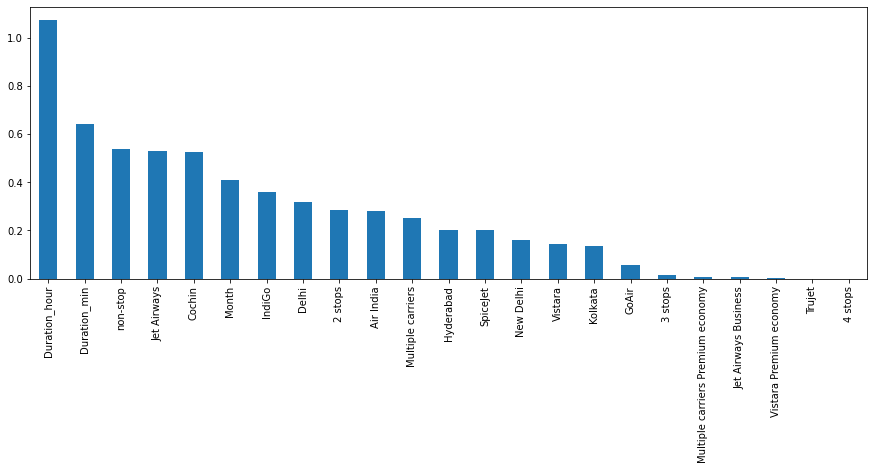

In [24]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


TRAINING (with all the features)

In [25]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
clf.score(X_train, y_train)

0.8648895568052906

In [27]:
score = clf.score(X_val, y_val)
print("R2-score:   %0.3f" % score)

R2-score:   0.668


Training with only the best features

In [46]:
from sklearn.feature_selection import SelectKBest
#select the  top 10 important features
cols = SelectKBest(mutual_info_regression, k=10)
cols.fit(X_train, y_train)
X_train.columns[cols.get_support()]

Index(['Month', 'Air India', 'IndiGo', 'Jet Airways', 'Duration_hour',
       'Duration_min', 'Cochin', 'Delhi', '2 stops', 'non-stop'],
      dtype='object')

In [29]:
X_train1 = X_train[['Month', 'Air India', 'IndiGo', 'Jet Airways', 'Duration_hour',
       'Duration_min', 'Cochin', 'Delhi', '2 stops', 'non-stop']]

In [30]:
clf1 = RandomForestRegressor()
clf1.fit(X_train1, y_train)

RandomForestRegressor()

In [31]:
clf1.score(X_train1, y_train)

0.8252500412995006

In [32]:
score1 = clf1.score(X_val[['Month', 'Air India', 'IndiGo', 'Jet Airways', 'Duration_hour',
       'Duration_min', 'Cochin', 'Delhi', '2 stops', 'non-stop']], y_val)
print("R2-score:   %0.3f" % score1)

R2-score:   0.453


Doing a Randomized search CV with different regression models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import time as time

In [53]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {
    'KNN': {
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[7,9,11,13,15],
            'weights':['uniform','distance']
        }
    },
    
    'Random Forest':{
        'model':RandomForestRegressor(),
        'params' : {
            'n_estimators':[50,75,100,125,150,175,200]
        }
    },

    'SVR': {
        'model':SVR(gamma="auto"),
        'params' : {
            'C':[1,10,20],
        }
    },
  
    'ANN': {
        'model':MLPRegressor(),
        'params' : {
            'hidden_layer_sizes':[(100,),(54,108,54,27)],
            'activation':['relu'],
            'solver':['sgd','adam']
        }
    }
}

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
scores = []

for model_name, mp in model_params.items():
    start = time.time()
    print (model_name," started...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,scoring='r2')
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    print (model_name," completed...")
    
    
    end = time.time()
    duration = end - start
    if (duration>=3600):
        hours = duration//3600
        mins = (duration%3600)//60
        secs = duration%60
    elif (duration>=60):
        hours = 0
        mins= duration//60
        secs = duration%60
    else:
        hours = 0
        mins = 0
        secs = duration
    print (round(hours,2), " hr(s) ",round(mins,2)," min(s) ",round(secs,2), " sec(s)\n")

KNN  started...
KNN  completed...
0  hr(s)  0  min(s)  17.8  sec(s)

Random Forest  started...
Random Forest  completed...
0  hr(s)  0  min(s)  54.54  sec(s)

SVR  started...
SVR  completed...
0  hr(s)  1.0  min(s)  20.65  sec(s)

ANN  started...
ANN  completed...
0  hr(s)  4.0  min(s)  53.25  sec(s)



In [57]:
results_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results_df.sort_values('best_score',ascending=False)

,model,best_score,best_params
1,Random Forest,0.692824,{'n_estimators': 100}
3,ANN,0.692292,"{'solver': 'adam', 'hidden_layer_sizes': (54, ..."
0,KNN,0.545017,"{'weights': 'distance', 'n_neighbors': 7}"
2,SVR,0.279465,{'C': 20}


So Random Forest performs the best in terms of best score in r2 

In [59]:
# training with rf using the best params on X_train and evaluating it on X_val
clf2 = RandomForestRegressor(n_estimators = 100)
clf2.fit(X_train, y_train)
print(clf2.score(X_train,y_train))

0.863888114262342


In [60]:
print(clf2.score(X_val,y_val))

0.6669814999421741
